# Wind Energy Output Prediction- Data Analysis

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset T1.csv
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ae1b71cc049e4c9b85a0caaac9f48f6b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fkN5rfWxqzFUB5jfSeECyUF42hiw9GX3FttH23yskjVe',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ae1b71cc049e4c9b85a0caaac9f48f6b.get_object(Bucket='windenergyprediction-donotdelete-pr-ymmffemp38clbr',Key='T1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
dataset.drop('Theoretical_Power_Curve (KWh)',axis=1,inplace=True)

In [4]:
dataset.dtypes

Date/Time               object
LV ActivePower (kW)    float64
Wind Speed (m/s)       float64
Wind Direction (°)     float64
dtype: object

In [9]:
# Convert Date/Time into Datetime
dataset['Date/Time']=pd.to_datetime(dataset['Date/Time'])

In [10]:
dataset.set_index('Date/Time',inplace=True)

In [11]:
dataset.head()

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°)
Date/Time,,,
2018-01-01 00:00:00,380.047791,5.311336,259.994904
2018-01-01 00:10:00,453.769196,5.672167,268.641113
2018-01-01 00:20:00,306.376587,5.216037,272.564789
2018-01-01 00:30:00,419.645905,5.659674,271.258087
2018-01-01 00:40:00,380.650696,5.577941,265.674286


In [12]:
dataset.describe()

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,123.687559
std,1312.459242,4.227166,93.443736
min,-2.471405,0.000000,0.000000
25%,50.677890,4.201395,49.315437
50%,825.838074,7.104594,73.712978
75%,2482.507568,10.300020,201.696720
max,3618.732910,25.206011,359.997589


## Visualize the Data

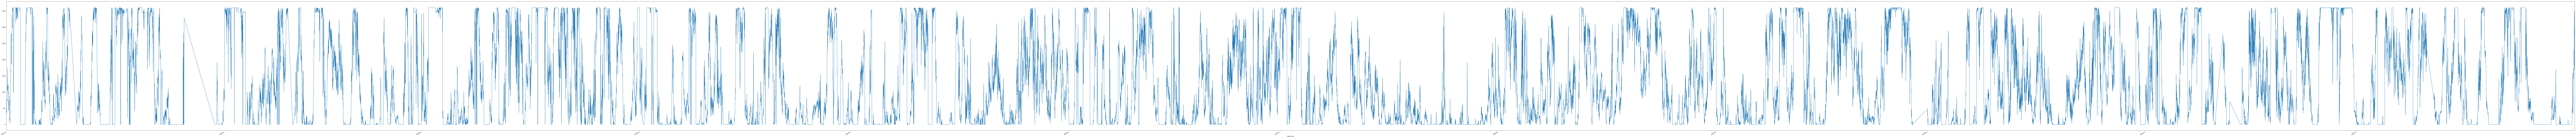

In [17]:
dataset['LV ActivePower (kW)'].plot(figsize=(350,20))

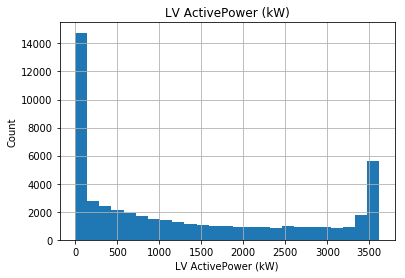

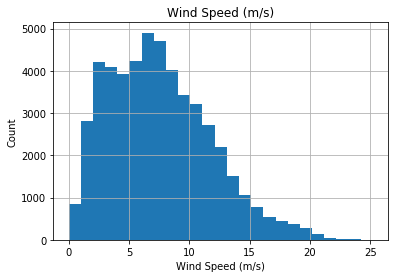

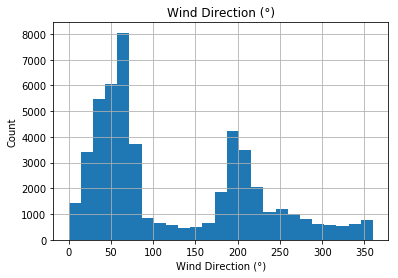

In [19]:
for feature in ['LV ActivePower (kW)','Wind Speed (m/s)','Wind Direction (°)']:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

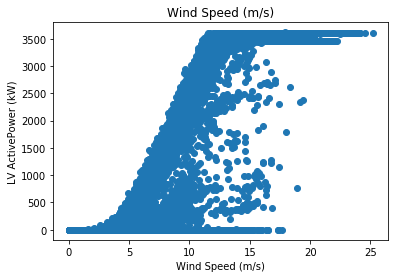

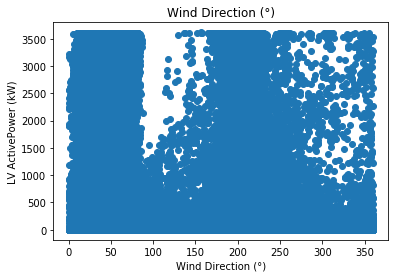

In [21]:
for feature in ['Wind Speed (m/s)','Wind Direction (°)']:
    data=dataset.copy()
    plt.scatter(data[feature],data['LV ActivePower (kW)'])
    plt.xlabel(feature)
    plt.ylabel('LV ActivePower (kW)')
    plt.title(feature)
    plt.show()

## Testing For Stationarity

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
test_result=adfuller(dataset['LV ActivePower (kW)'])

In [24]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(power):
    result=adfuller(power)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [25]:
adfuller_test(dataset['LV ActivePower (kW)'])

ADF Test Statistic : -14.008554764649642
p-value : 3.74966000642018e-26
#Lags Used : 36
Number of Observations Used : 50493
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
